## Hailey Sparks
## AMATH 582 HW 5
## Identification of EEG Waveforms the Characterize Traumatic Events

In [30]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from statistics import mode
from statistics import mean
from sklearn.model_selection import train_test_split
import collections

In [31]:
# training participants

data_1 = pd.read_csv('Data/EEGdata_event_173012.csv')
data_2 = pd.read_csv('Data/EEGdata_event_R2D2_013.csv')
data_3 = pd.read_csv('Data/EEEGdata_event_174258.csv')
#data_4 = pd.read_csv('EEEGdata_event_176859.csv)
data_4 = pd.read_csv('Data/EEEGdata_event_R2D2_003.csv')
data_5 = pd.read_csv('Data/EEEGdata_event_R2D2_001.csv')
data_6 = pd.read_csv('Data/EEEGdata_event_R2D2_007.csv')
data_7 = pd.read_csv('Data/EEEGdata_event_R2D2_008.csv')
data_8 = pd.read_csv('Data/EEEGdata_event_R2D2_010.csv')
data_9 = pd.read_csv('Data/EEEGdata_event_R2D2_016.csv')

# testing participants

data_10 = pd.read_csv('Data/EEEGdata_event_R2D2_018.csv')
data_11 = pd.read_csv('Data/EEEGdata_event_Stormtrooper_004.csv')
data_12 = pd.read_csv('Data/EEEGdata_event_Stormtrooper_005.csv')

In [32]:
data_1 = data_1.drop('Event', axis=1)
data_2 = data_2.drop('Event', axis=1)
data_3 = data_3.drop('Event', axis=1)
data_4 = data_4.drop('Event', axis=1)
data_5 = data_5.drop('Event', axis=1)
data_6 = data_6.drop('Event', axis=1)
data_7 = data_7.drop('Event', axis=1)
data_8 = data_8.drop('Event', axis=1)
data_9 = data_9.drop('Event', axis=1)
data_10 = data_10.drop('Event', axis=1)
data_11 = data_11.drop('Event', axis=1)
data_12 = data_12.drop('Event', axis=1)

In [33]:
train_files = [data_1.to_numpy(),data_2.to_numpy(),data_3.to_numpy(),
               data_4.to_numpy(),data_5.to_numpy(),data_6.to_numpy(),data_7.to_numpy(),data_8.to_numpy(),
               data_9.to_numpy()]
train_data = np.vstack(train_files)

test_files = [data_10.to_numpy(),data_11.to_numpy(),data_12.to_numpy()]
test_data = np.vstack(test_files)


all_files = [data_1.to_numpy(),data_2.to_numpy(),data_3.to_numpy(),
               data_4.to_numpy(),data_5.to_numpy(),data_6.to_numpy(),data_7.to_numpy(),data_8.to_numpy(),
               data_9.to_numpy(), data_10.to_numpy(),data_11.to_numpy(),data_12.to_numpy()]
all_data = np.vstack(test_files)

In [34]:
train_data.shape

(126539, 8)

# PCA

In [35]:
from sklearn.decomposition import PCA
X_train = train_data
pca = PCA()
pca_res = pca.fit_transform(X_train)
S=pca.singular_values_

In [36]:
S

array([48.79470394, 17.80121093, 10.45867812,  8.28363772,  6.95669682,
        5.20313716,  4.21305737,  4.00241271])

In [37]:
import math
    
def f_norm(n):
    s=0
    s=pca.singular_values_
    s = s[:n]
    norm=np.sum(s**2)
    
    print("n components: ", n, "norm: ", norm)
    return norm
    
    

# 70%, 80% , 90% , 95%

def per_norm(energies):
    #stop = False
    res = []
    for i in range(0,len(energies)):
        num_c = i+1
        perc = energies[i]/total_energy
        res.append(perc*100)
        print("Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to ", perc*100, "% in Frobenius norm: ", num_c)
    return res

In [38]:
# Print the energy for each number of spatial nodes used 

res = []
ns = [i for i in range(0,9)]
for n in ns:
    res.append(f_norm(n))

n components:  0 norm:  0.0
n components:  1 norm:  2380.923132843532
n components:  2 norm:  2697.806243581533
n components:  3 norm:  2807.1901916193183
n components:  4 norm:  2875.808845532426
n components:  5 norm:  2924.204476145805
n components:  6 norm:  2951.277112465874
n components:  7 norm:  2969.0269648819535
n components:  8 norm:  2985.046272402669


In [39]:
total_energy = 2985.046272402669

Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  0.0 % in Frobenius norm:  1
Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  79.76168258615043 % in Frobenius norm:  2
Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  90.37736763155984 % in Frobenius norm:  3
Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  94.04176469799934 % in Frobenius norm:  4
Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  96.3405114392978 % in Frobenius norm:  5
Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  97.96178046486723 % in Frobenius norm:  6
Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  98.86872239639976 % in Frobenius norm:  7
Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  99.46334810053644 % in Frobenius norm:  8
Number of PCA spatial modes you need to keep to approximate 𝑋𝑡𝑟𝑎𝑖𝑛 up to  100.0 % in Fr

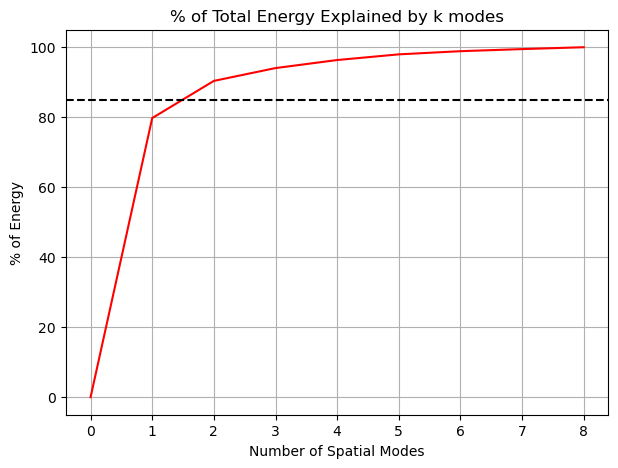

In [40]:
percentages = per_norm(res)
plt.figure(figsize=(7, 5))

plt.plot(percentages, c = 'red')
plt.title("% of Total Energy Explained by k modes")
plt.axhline(85, linestyle = '--', c='black')
plt.xlabel("Number of Spatial Modes")
plt.ylabel("% of Energy")
plt.grid()

Text(0, 0.5, 'Energy')

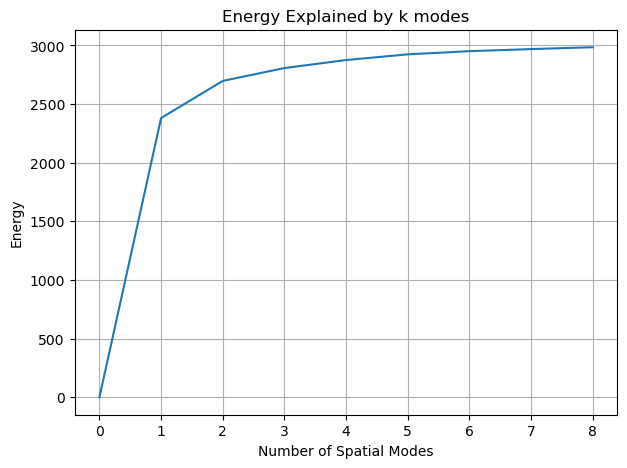

In [41]:
plt.figure(figsize=(7, 5))

plt.plot(res)
plt.xlabel("Number of Spatial Modes")
plt.title("Energy Explained by k modes")
plt.grid(True)
plt.ylabel("Energy")

## Now for classification:

### do multiclass

In [42]:
def assign_result(cur_data):
    baselines = get_baselines(cur_data)

    epoch_means = cur_data.mean()
    epoch_stds = cur_data.std()
    cur_data['Event'] = ""
    thresholds = []
    for i in range(0, len(epoch_means)):
        thresholds.append(epoch_means.iloc[i] + (1 * epoch_stds.iloc[i]))

    for i in range(0, len(cur_data)):
        cur_row = cur_data.iloc[i]
        cur_result = determine_result_quantile(cur_row, epoch_means, epoch_stds)  # quantile result
        cur_data.iloc[[i], [8]] = cur_result
    return [cur_data, thresholds, epoch_means, epoch_stds]

def determine_result_quantile(row, means, stds):
    wave_decisions = {'Delta': "", 'Theta': "", 'AlphaLow': "", 'AlphaHigh': "",
                      'BetaLow': "", 'BetaHigh': "", 'GammaLow': "", 'GammaMid': ""}

    count = 0
    for key, value in wave_decisions.items():
        wave = key
        cur_wave = row[wave]
        cur_mean = means.iloc[count]

        if cur_wave >= (cur_mean * .75) + cur_mean:
            wave_decisions[wave] = 'High'
        elif cur_wave > (cur_mean * .5) + cur_mean:
            wave_decisions[wave] = 'Medium'
        elif cur_wave > (cur_mean * .25) + cur_mean:
            wave_decisions[wave] = 'Low'
        else:
            wave_decisions[wave] = 'Non-Trauma'
        count = count + 1

    result = mode(wave_decisions.values())
    #print(result)
    num_high = sum(value == 'High' for value in wave_decisions.values())
    if (num_high >= 4):
        # result = 'High'
        result = "001"
    elif (sum(value == 'Medium' for value in wave_decisions.values()) + sum(
            value == 'High' for value in wave_decisions.values()) >= 4):
        # result = 'Medium'
        result = "010"
    elif (sum(value == 'Low' for value in wave_decisions.values()) + sum(
            value == 'Medium' for value in wave_decisions.values()) >= 4):
        # result = 'Low'
        result = "100"
    else:
        # result = "Non-Trauma"
        result = "000"

    return result

def get_baselines(cur_data):
    baseline_values = []
    epoch_means = cur_data.mean()
    epoch_stds = cur_data.std()
    for i in range(0, 8):
        baseline_values.append(epoch_means.iloc[i] + (1 * epoch_stds.iloc[i]))

    return baseline_values

In [44]:
train_df = pd.DataFrame(train_data, columns=data_1.columns)
test_df = pd.DataFrame(test_data, columns=data_1.columns)
ytrainlabels = assign_result(train_df)[0]['Event']
ytestlabels = assign_result(test_df)[0]['Event']

In [46]:
entire_df = pd.DataFrame(all_data, columns=data_1.columns)
entire_df

,Delta,Theta,AlphaLow,AlphaHigh,BetaLow,BetaHigh,GammaLow,GammaMid
0,0.438556,0.389575,0.255093,0.185317,0.180096,0.206526,0.193911,0.082265
1,0.438680,0.389990,0.255083,0.185851,0.180127,0.206612,0.193824,0.082438
2,0.438804,0.390402,0.255073,0.186382,0.180158,0.206698,0.193737,0.082610
3,0.438928,0.390812,0.255063,0.186911,0.180188,0.206784,0.193649,0.082781
4,0.439052,0.391219,0.255053,0.187437,0.180218,0.206869,0.193561,0.082950
...,...,...,...,...,...,...,...,...
28574,0.474875,0.483518,0.302951,0.263027,0.271290,0.251108,0.226708,0.134324
28575,0.475019,0.484197,0.304054,0.263811,0.272424,0.252445,0.228565,0.135594
28576,0.475164,0.484882,0.305166,0.264601,0.273567,0.253792,0.230435,0.136873
28577,0.475311,0.485572,0.306288,0.265399,0.274718,0.255150,0.232317,0.138160


In [50]:
#for i in range(0,len(ytrainlabels)):
 #   if ytrainlabels[i]!='000':
 #       print(ytrainlabels[i])

#example_labels = assign_result(data_1)[0]['Event']
all_events = ytrainlabels

Text(0, 0.5, 'Number of Instances')

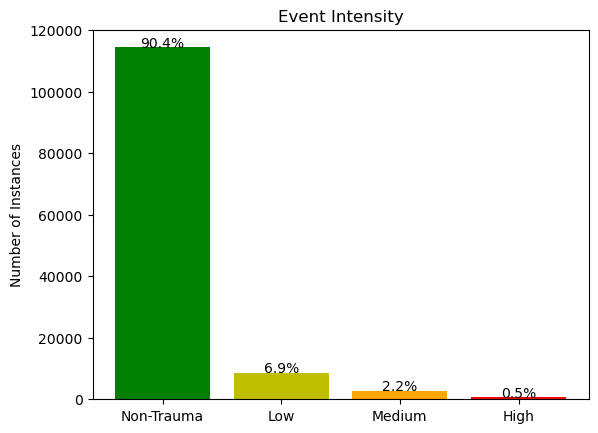

In [51]:
bar_colors = ["g","y","orange","red"]
string_events = []
# create a list of each event in string form 
for i in range(0,len(all_events)):
    if all_events[i] == "000":
        string_events.append("Non-Trauma")
    elif all_events[i] == "100":
        string_events.append("Low")
    elif all_events[i] == "010":
        string_events.append("Medium")
    else:
        string_events.append("High")

c = collections.Counter(string_events)
# the trauma level
x = [key for key,value in c.items()]
# the frequency (count) of each trauma level 
y = [value for key,value in c.items()]
bar_colors =["g","y","orange","red"]
# total number of occurences/events
total = sum(value for key,value in c.items())
percentages = []

# calculate trauma level percentages 
for value in y:
    per = round((value/total),3)*100
    percentages.append(np.round(per,2))

# plots the bar chart
pps = plt.bar(x,y, color = bar_colors)
num = 0
# puts the percentage value above each bar 
for p in pps:
    plt.text(x=p.get_x() + p.get_width() / 2, y=p.get_height()+.20,
        s="{}%".format(percentages[num]), ha='center')
    num = num+1

plt.title("Event Intensity")
plt.ylabel("Number of Instances")

In [52]:
#example_labels = assign_result(data_1)[0]['Event']
all_events = ytestlabels

Text(0, 0.5, 'Number of Instances')

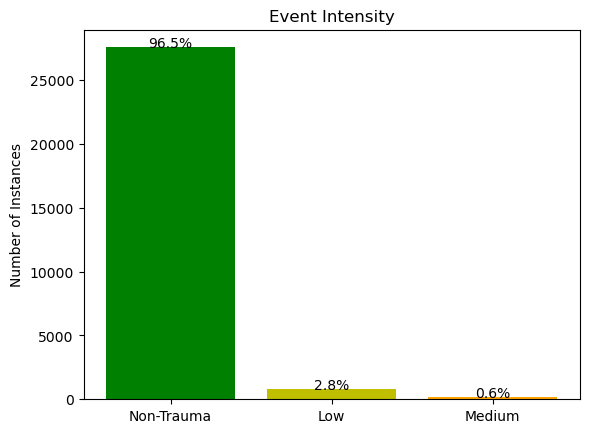

In [53]:
bar_colors = ["g","y","orange","red"]
string_events = []
# create a list of each event in string form 
for i in range(0,len(all_events)):
    if all_events[i] == "000":
        string_events.append("Non-Trauma")
    elif all_events[i] == "100":
        string_events.append("Low")
    elif all_events[i] == "010":
        string_events.append("Medium")
    else:
        string_events.append("High")

c = collections.Counter(string_events)
# the trauma level
x = [key for key,value in c.items()]
# the frequency (count) of each trauma level 
y = [value for key,value in c.items()]
bar_colors =["g","y","orange","red"]
# total number of occurences/events
total = sum(value for key,value in c.items())
percentages = []

# calculate trauma level percentages 
for value in y:
    per = round((value/total),3)*100
    percentages.append(np.round(per,2))

# plots the bar chart
pps = plt.bar(x,y, color = bar_colors)
num = 0
# puts the percentage value above each bar 
for p in pps:
    plt.text(x=p.get_x() + p.get_width() / 2, y=p.get_height()+.20,
        s="{}%".format(percentages[num]), ha='center')
    num = num+1

plt.title("Event Intensity")
plt.ylabel("Number of Instances")

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [31]:
def perform_knn(Xtraindata, ytrainlabels, Xtestdata, ytestlabels, n=29, c=5, num_neighbors = 3):

    pca = PCA(n_components = n)
    pca_res = pca.fit_transform(Xtraindata)
    print(pca_res.shape)
    # this is in PC space 

    #trans_train =  pca.transform(Xtraindata.T)
    trans_test =  pca.transform(Xtestdata)
    print(trans_test.shape)


    KNNCL = KNeighborsClassifier(n_neighbors=num_neighbors)
    KNNCL.fit(pca_res, ytrainlabels)
    
    print("Training Score: {}".format(KNNCL.score(pca_res, ytrainlabels)))
    print("Testing Score: {}".format(KNNCL.score(trans_test, ytestlabels)))
    
    scores = cross_val_score(KNNCL, pca_res, ytrainlabels, cv=c)
    print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))
    
    
    return [KNNCL.score(pca_res, ytrainlabels), KNNCL.score(trans_test, ytestlabels), scores.mean()]

In [32]:
perform_knn(train_data, ytrainlabels, test_data, ytestlabels, n=3, c=5, num_neighbors = 3)

(126539, 3)
(28579, 3)
Training Score: 0.9989884541524747
Testing Score: 0.9772910178802617
0.924204982820448 accuracy with a standard deviation of 0.040931380316201596


[0.9989884541524747, 0.9772910178802617, 0.924204982820448]

In [36]:
knn_train_results = []
knn_test_results = []
cv_means = []


for i in range(1,21):
    train, test, mean = perform_knn(train_data, ytrainlabels, test_data, ytestlabels, n=3, c=5, num_neighbors = i)
    knn_train_results.append(train)
    knn_test_results.append(test)
    cv_means.append(mean)

(126539, 3)
(28579, 3)
Training Score: 1.0
Testing Score: 0.9776059344273768
0.9250822379448118 accuracy with a standard deviation of 0.039229559514755874
(126539, 3)
(28579, 3)
Training Score: 0.9986328325654541
Testing Score: 0.9773260086077189
0.9238652408327743 accuracy with a standard deviation of 0.038255481141763886
(126539, 3)
(28579, 3)
Training Score: 0.9989884541524747
Testing Score: 0.9772910178802617
0.924204982820448 accuracy with a standard deviation of 0.040931380316201596
(126539, 3)
(28579, 3)
Training Score: 0.9983246271900362
Testing Score: 0.97718604569789
0.9242840204570161 accuracy with a standard deviation of 0.04039041293120789
(126539, 3)
(28579, 3)
Training Score: 0.9989094271331368
Testing Score: 0.9770810735155184
0.9239599438509455 accuracy with a standard deviation of 0.04219960247041343
(126539, 3)
(28579, 3)
Training Score: 0.9976212867179288
Testing Score: 0.9768361384233178
0.9244262192534254 accuracy with a standard deviation of 0.041538207864727485


Text(0.5, 1.0, 'KNN Model Performance')

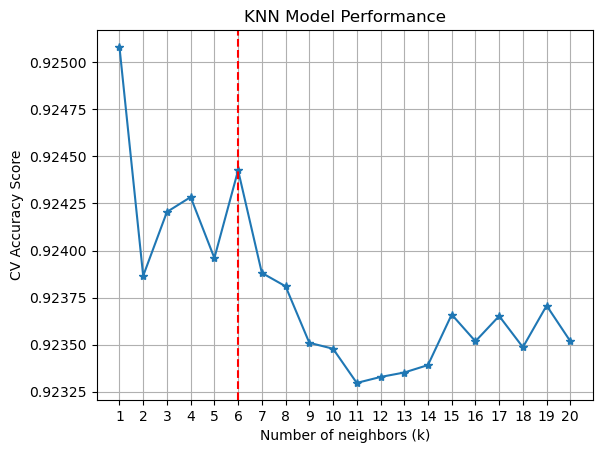

In [66]:
#plt.plot(knn_train_results)
#plt.plot(knn_test_results)
plt.plot([i for i in range(1,21)], cv_means, '-*')
plt.grid()
plt.xticks([i for i in range(1,21)])
plt.axvline(6, linestyle = '--', c = 'red')
plt.xlabel("Number of neighbors (k)")
plt.ylabel("CV Accuracy Score")
plt.title("KNN Model Performance")
#plt.ylim(.92,1)

## Ridge Regression

In [90]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [115]:
def perform_ridge(Xtraindata, ytrainlabels, Xtestdata, ytestlabels, n, k):       
        
    pca = PCA(n_components = n)
    pca_res = pca.fit_transform(Xtraindata)

    # this is in PC space 

    trans_train =  pca.transform(Xtraindata)
    #trans_train = pca_res
    trans_test =  pca.transform(Xtestdata)
    
    #RidgeCL = RidgeClassifierCV()
    RidgeCL = RidgeClassifier(alpha=10)
    RidgeCL.fit(trans_train, ytrainlabels)
    
    print("Training Score: {}".format(RidgeCL.score(trans_train, ytrainlabels)))
    print("Testing Score: {}".format(RidgeCL.score(trans_test, ytestlabels)))
    
    scores = cross_val_score(RidgeCL, trans_test, ytestlabels, cv=k)
    print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

    y_pred = RidgeCL.predict(trans_test)
    
    
    
    cm = confusion_matrix(ytestlabels, y_pred, normalize = 'pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Non-Trauma", "Low Trauma", "Moderate Trauma"])
    disp.plot()
    plt.title("Confusion Matrix for Ridge Regression")
    plt.show()
    
    

   # fig, ax = plt.subplots(figsize=(10, 5))
   # ConfusionMatrixDisplay.from_predictions(ytestlabels, y_pred, ax=ax)
    #ax.xaxis.set_ticklabels(y_names)
    #ax.yaxis.set_ticklabels(y_names)
  #  _ = ax.set_title(
  #      f"Confusion Matrix for {RidgeCL.__class__.__name__} Classification"
  #  )


Training Score: 0.9049937173519627
Testing Score: 0.9664788830959795
0.9653941752732272 accuracy with a standard deviation of 6.756678158406083e-05


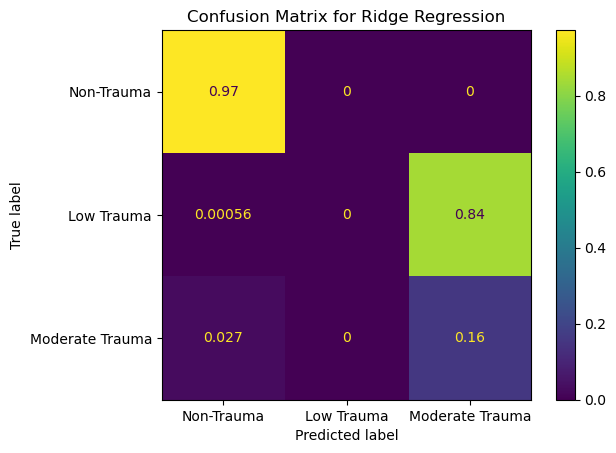

In [117]:
perform_ridge(train_data, ytrainlabels, test_data, ytestlabels, 3, 5)

# LDA

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [119]:
def perform_lda(Xtraindata, ytrainlabels, Xtestdata, ytestlabels, digits, n=3, c=5):
    pca = PCA(n_components = n)
    pca_res = pca.fit_transform(Xtraindata)

    # this is in PC space 

    trans_train =  pca.transform(Xtraindata)
    trans_test =  pca.transform(Xtestdata)
    
    LDACL = LinearDiscriminantAnalysis()
    LDACL.fit(trans_train, ytrainlabels)
    
    print("Training Score: {}".format(LDACL.score(trans_train, ytrainlabels)))
    print("Testing Score: {}".format(LDACL.score(trans_test, ytestlabels)))
    
    scores = cross_val_score(LDACL, trans_train, ytrainlabels, cv=c)
    print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))
    
    y_pred = LDACL.predict(trans_test)
    
    
    cm = confusion_matrix(ytestlabels, y_pred, normalize = 'pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Non-Trauma", "Low Trauma", "Moderate Trauma"])
    disp.plot()
    plt.title("Confusion Matrix for LDA")
    plt.show()
    

Training Score: 0.9403108922940754
Testing Score: 0.9764512404212884
0.9144529264713404 accuracy with a standard deviation of 0.05529270146660635


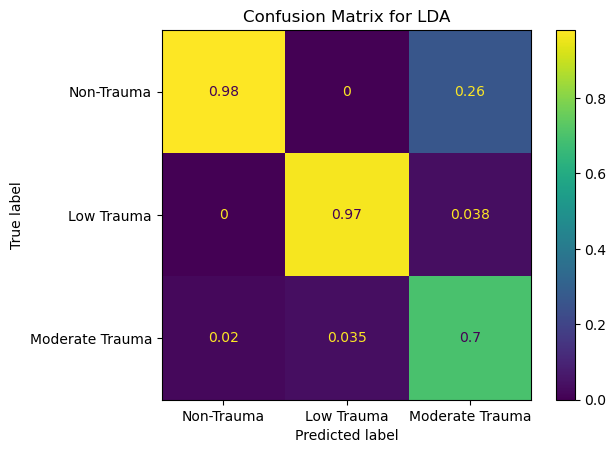

In [120]:
perform_lda(train_data, ytrainlabels, test_data, ytestlabels, 3, 5)

# SVM

In [121]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [129]:
def perform_svm(Xtraindata, ytrainlabels, Xtestdata, ytestlabels, n=3, c=5):
    pca = PCA(n_components = n)
    pca_res = pca.fit_transform(Xtraindata)

    # this is in PC space 

    trans_train =  pca.transform(Xtraindata)
    trans_test =  pca.transform(Xtestdata)
    
    clf = SVC()
    clf.fit(trans_train, ytrainlabels)
    
    print("Training Score: {}".format(clf.score(trans_train, ytrainlabels)))
    print("Testing Score: {}".format(clf.score(trans_test, ytestlabels)))
    
    scores = cross_val_score(clf, trans_train, ytrainlabels, cv=c)
    print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))
    
    y_pred = clf.predict(trans_test)

    cm = confusion_matrix(ytestlabels, y_pred, normalize = 'pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Non-Trauma", "Low Trauma", "Moderate Trauma"])
    disp.plot()
    plt.title("Confusion Matrix for SVM")
    plt.show()
    

Training Score: 0.9700250515651301
Testing Score: 0.9811399979005564
0.9423654697491977 accuracy with a standard deviation of 0.03520476449460541


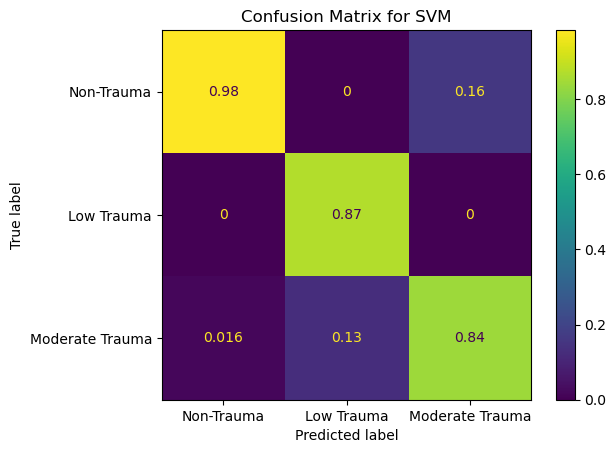

In [130]:
perform_svm(train_data, ytrainlabels, test_data, ytestlabels, n=3, c=5)

In [128]:
from sklearn.neural_network import MLPClassifier

In [134]:
def perform_nn(Xtraindata, ytrainlabels, Xtestdata, ytestlabels,n,c):
    pca = PCA(n_components = n)
    pca_res = pca.fit_transform(Xtraindata)

    # this is in PC space 

    trans_train =  pca.transform(Xtraindata)
    trans_test =  pca.transform(Xtestdata)
    
    #LDACL = LinearDiscriminantAnalysis()
    #LDACL.fit(trans_train, ytrainlabels)
    
    mlp= MLPClassifier(solver='adam', alpha=1e-2,
                    hidden_layer_sizes=(256, 256), random_state=1)
    mlp.fit(trans_train, ytrainlabels)
    
    print("Training Score: {}".format(mlp.score(trans_train, ytrainlabels)))
    print("Testing Score: {}".format(mlp.score(trans_test, ytestlabels)))
    
    scores = cross_val_score(mlp, trans_train, ytrainlabels, cv=c)
    print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))
    
    y_pred = mlp.predict(trans_test)
    
    
    cm = confusion_matrix(ytestlabels, y_pred, normalize = 'pred')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Non-Trauma", "Low Trauma", "Moderate Trauma"])
    disp.plot()
    plt.title("Confusion Matrix for NN")
    plt.show()

Training Score: 0.974268802503576
Testing Score: 0.9808600720808985
0.9424760907761243 accuracy with a standard deviation of 0.03596018516539295


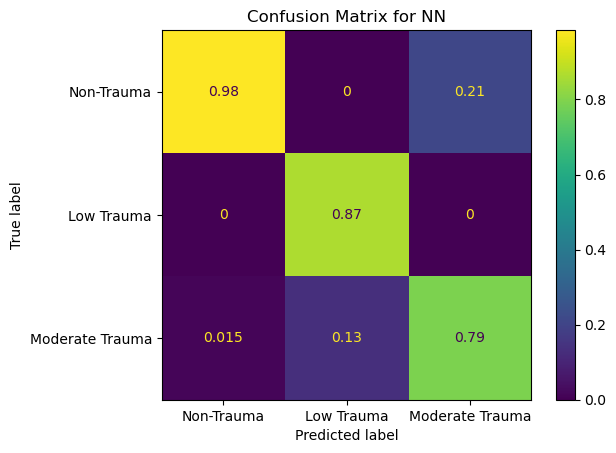

In [135]:
perform_nn(train_data, ytrainlabels, test_data, ytestlabels, n=3, c=5)